<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [ ]:
#@markdown **Just run to prepare Lab**
%%capture none
!pip install dataprep

import pandas as pd

from dataprep.datasets import load_dataset
df = load_dataset('house_prices_train')

df = df[[ 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'YearBuilt', 'BedroomAbvGr', 'YrSold', 'SaleType', 'SalePrice', 'GrLivArea']]
df.to_csv('house_prices.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



# **CASE: House Prices**

In [ ]:
df = pd.read_csv("house_prices.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,YearBuilt,BedroomAbvGr,YrSold,SaleType,SalePrice,GrLivArea
0,60,RL,65.0,8450,2003,3,2008,WD,208500,1710
1,20,RL,80.0,9600,1976,3,2007,WD,181500,1262
2,60,RL,68.0,11250,2001,3,2008,WD,223500,1786
3,70,RL,60.0,9550,1915,3,2006,WD,140000,1717
4,60,RL,84.0,14260,2000,4,2008,WD,250000,2198


# Q1. Linear Correlations

Crie gráficos de dispersão ou empregue o `pairplot` para verificar qual atributos dos imóveis apresenta maior correlação com os preços dos imóveis. Confirme isso verificando a correlação (Pearson) com o método `.corr()` ou a função `np.pearson()`. Sugestão: explore esses métodos na documentação das bibliotecas.

Q. Qual o atributo mais correlacionado aos preços e qual o valor do coeficiente (pearson) encontrado?

**Dica:** melhor com `df.select_dtypes(include='number')`

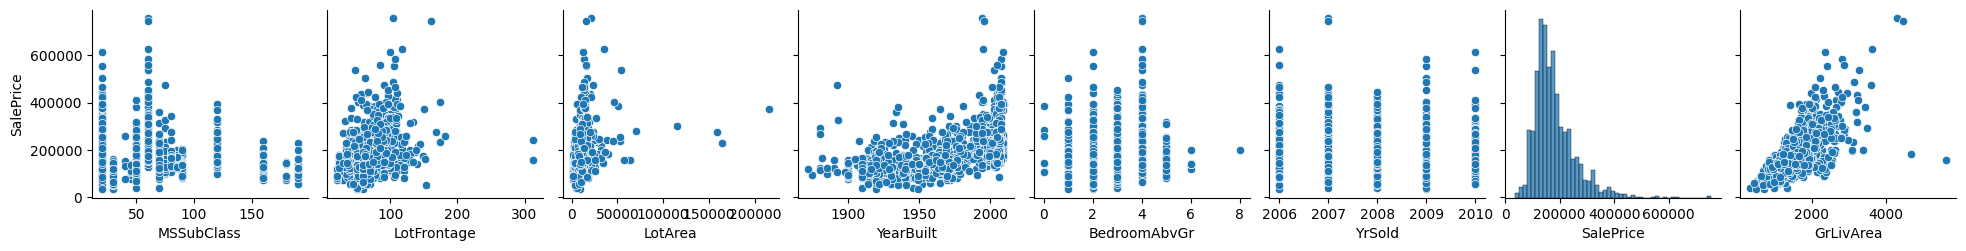

In [ ]:
sns.pairplot(df.select_dtypes(include='number'),y_vars = ["SalePrice"])

In [ ]:
df.corr()[["SalePrice"]]

<ipython-input-146-de0f10095ba3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[["SalePrice"]]


,SalePrice
MSSubClass,-0.084284
LotFrontage,0.351799
LotArea,0.263843
YearBuilt,0.522897
BedroomAbvGr,0.168213
YrSold,-0.028923
SalePrice,1.000000
GrLivArea,0.708624


# Q2. Correlation Heatmap

Produza um `heatmap` das correlações numéricas de todas as variáveis. Inclua os valores das correlações no gráfico (parâmetro `annot`) e ajuste deamais aspectos do gráfico para que fique legível e com bom aspecto. Algumas sugestões estão nas alternativas do questionário e você pode buscar se aproximar da figura abaixo.

Q2. No ajuste do aspecto do gráfico o que pareceu ser mais útil?

<ipython-input-147-7690d3082f28>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True )


<Axes: >

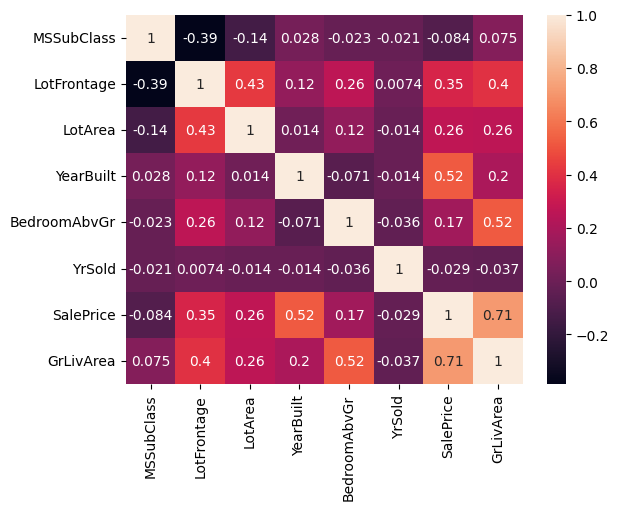

In [ ]:
sns.heatmap(df.corr(),annot=True )

# Q3. "*Nice*" Correlation Table

Use a função abaixo para produzir a tabela de correlação para os diferentes coeficientes, isto é *pearson*, *spearman* e *kendall*.

Q3. Para que atributos os coeficientes divergem de orientação?

Sim, os coeficientes podem divergir!


In [ ]:
import pandas as pd
from IPython.display import display, Latex, HTML

def gera_latex_table(df, titulo):
# create a latex table from a dataframe
# Created by: Rogerio de Oliveira
# Date: 2023-12-05
#
# issues: df.style.to_latex changes, replace changes


  latex_table = df.style.to_latex(hrules=True)

  latex_table = latex_table.replace('tabular','array')
  latex_table = latex_table.replace('toprule','hline')
  latex_table = latex_table.replace('midrule','hline')
  latex_table = latex_table.replace('bottomrule','hline')

  latex_table = '\\textbf{' + titulo + '} \\\\' + latex_table

  return latex_table

In [ ]:
df_corr_PEARSON = df.corr()[["SalePrice"]]
df_spearman = df.corr(method='spearman')[["SalePrice"]]
df_kendall =  df.corr(method='kendall')[["SalePrice"]]

df_corr = pd.concat([df_corr_PEARSON, df_spearman, df_kendall], axis=1)
df_corr.columns = ['Pearson', 'Spearman', 'Kendall']


<ipython-input-149-19ad932cd706>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_PEARSON = df.corr()[["SalePrice"]]
<ipython-input-149-19ad932cd706>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_spearman = df.corr(method='spearman')[["SalePrice"]]
<ipython-input-149-19ad932cd706>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_kendall =  df.corr(method='kendall')[["SalePrice"]]


In [ ]:
display(Latex(gera_latex_table(df_corr,'SalePrice Correlations')))

<IPython.core.display.Latex object>

In [ ]:
display(Latex(gera_latex_table(df_corr,'SalePrice Correlations')))

<IPython.core.display.Latex object>

# Q4. Outliers

Uma análise importante é a dos *outliers*. Exclua os outliers de preços e verifique se os coeficientes permanecem *robustos*.

Q. O coeficiente de *pearson* permanece robusto quanto ao atributo de maior correlação para os preços?

**Dica**: aprenda a usar `fig['fliers'][0].get_data()` do matplotlib para excluir os outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7ac14b844d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ac14b846530>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ac14b8447c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ac14b846f80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ac14b847310>],
 'means': []}

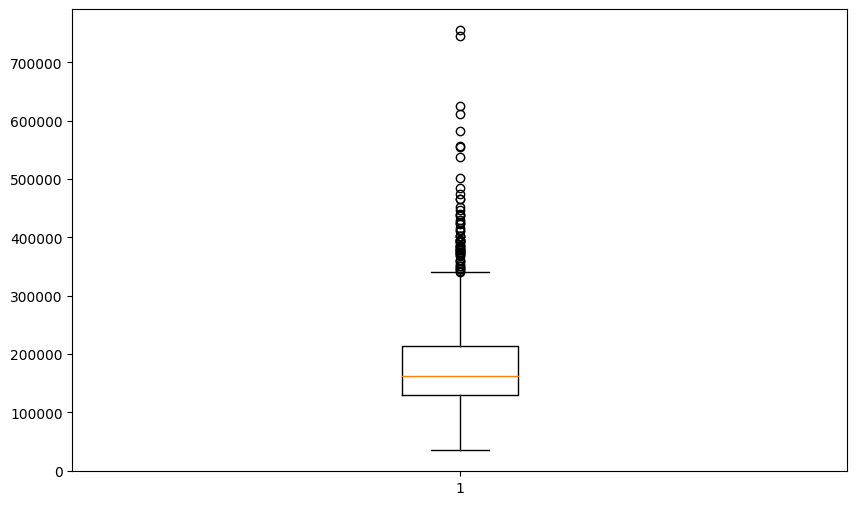

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
figura = plt.boxplot(x=df["SalePrice"])

figura


In [ ]:
df


,MSSubClass,MSZoning,LotFrontage,LotArea,YearBuilt,BedroomAbvGr,YrSold,SaleType,SalePrice,GrLivArea
0,60,RL,65.0,8450,2003,3,2008,WD,208500,1710
1,20,RL,80.0,9600,1976,3,2007,WD,181500,1262
2,60,RL,68.0,11250,2001,3,2008,WD,223500,1786
3,70,RL,60.0,9550,1915,3,2006,WD,140000,1717
4,60,RL,84.0,14260,2000,4,2008,WD,250000,2198
...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,1999,3,2007,WD,175000,1647
1456,20,RL,85.0,13175,1978,3,2010,WD,210000,2073
1457,70,RL,66.0,9042,1941,4,2010,WD,266500,2340
1458,20,RL,68.0,9717,1950,2,2010,WD,142125,1078


In [ ]:
outliers = figura['fliers'][0].get_data()[1]
df_no_outliers = df.drop(index=np.where(df["SalePrice"] == outliers[0])[0])


In [ ]:
outliers


array([345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000,
       386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426,
       437154, 394432, 426000, 555000, 440000, 380000, 374000, 430000,
       402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000,
       402000, 423000, 372500, 392000, 755000, 361919, 341000, 538000,
       395000, 485000, 582933, 385000, 350000, 611657, 395192, 348000,
       556581, 424870, 625000, 392500, 745000, 367294, 465000, 378500,
       381000, 410000, 466500, 377500, 394617])

In [ ]:
df_corr_PEARSON = df.corr()[["SalePrice"]]
df_spearman = df.corr(method='spearman')[["SalePrice"]]
df_kendall =  df.corr(method='kendall')[["SalePrice"]]

df_corr = pd.concat([df_corr_PEARSON, df_spearman, df_kendall], axis=1)
df_corr.columns = ['Pearson', 'Spearman', 'Kendall']

<ipython-input-156-19ad932cd706>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_PEARSON = df.corr()[["SalePrice"]]
<ipython-input-156-19ad932cd706>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_spearman = df.corr(method='spearman')[["SalePrice"]]
<ipython-input-156-19ad932cd706>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_kendall =  df.corr(method='kendall')[["SalePrice"]]


In [ ]:
display(Latex(gera_latex_table(df_corr,'SalePrice Correlations - NO OUTLIERS')))

<IPython.core.display.Latex object>

In [ ]:
# # prompt: Uma análise importante é a dos outliers. Exclua os outliers de preços e verifique se os coeficientes permanecem robustos.
# # Q. O coeficiente de pearson permanece robusto quanto ao atributo de maior correlação para os preços?
# # Dica: aprenda a usar fig['fliers'][0].get_data() do matplotlib para excluir os outliers.

# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# fig, ax = plt.subplots(figsize=(10,6))
# sns.boxplot(x=df["SalePrice"], ax=ax)
# outliers = fig['fliers'][0].get_data()[1]

# df_no_outliers = df.drop(index=np.where(df["SalePrice"] == outliers)[0])

# df_corr_PEARSON = df_no_outliers.corr()[["SalePrice"]]
# df_spearman = df_no_outliers.corr()[["SalePrice"]]
# df_kendall =  df_no_outliers.corr()[["SalePrice"]]

# df_corr_no_outliers = pd.concat([df_corr_PEARSON, df_spearman, df_kendall], axis=1)
# df_corr_no_outliers.columns = ['Pearson', 'Spearman', 'Kendall']

# display(Latex(gera_latex_table(df_corr_no_outliers,'SalePrice Correlations - NO OUTLIERS')))



texto


In [ ]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,YearBuilt,BedroomAbvGr,YrSold,SaleType,SalePrice,GrLivArea
0,60,RL,65.0,8450,2003,3,2008,WD,208500,1710
1,20,RL,80.0,9600,1976,3,2007,WD,181500,1262
2,60,RL,68.0,11250,2001,3,2008,WD,223500,1786
3,70,RL,60.0,9550,1915,3,2006,WD,140000,1717
4,60,RL,84.0,14260,2000,4,2008,WD,250000,2198
...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,1999,3,2007,WD,175000,1647
1456,20,RL,85.0,13175,1978,3,2010,WD,210000,2073
1457,70,RL,66.0,9042,1941,4,2010,WD,266500,2340
1458,20,RL,68.0,9717,1950,2,2010,WD,142125,1078


# Q5. Consistência do coeficiente por diferentes classes

Verifique se coeficiente de pearson para o atributo mais correlacionado é robusto para os diferentes tipos de venda `SaleType` e `MSZoning`.

Q. Para quais tipos o coeficiente se mantêm robusto?


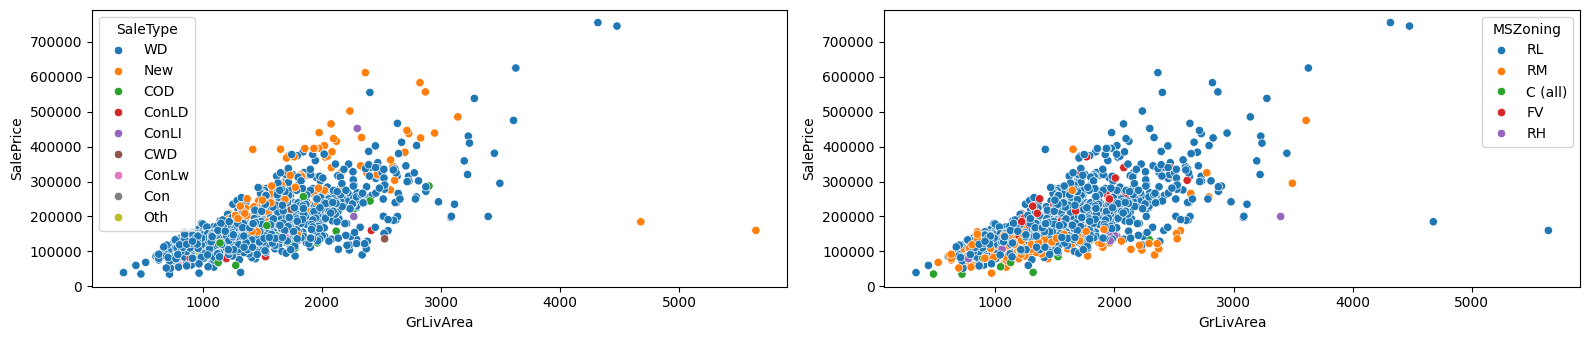

In [ ]:
plt.figure(figsize=(16, 3.5))

plt.subplot(1,2,1)
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'],hue=df['SaleType'])

plt.subplot(1,2,2)
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'],hue=df['MSZoning'])

plt.tight_layout()
plt.show()


In [ ]:
df_corr # by SaleType

,Pearson,Spearman,Kendall
MSSubClass,-0.084284,0.007192,-0.003979
LotFrontage,0.351799,0.409076,0.290361
LotArea,0.263843,0.456461,0.314174
YearBuilt,0.522897,0.652682,0.470960
BedroomAbvGr,0.168213,0.234907,0.185607
YrSold,-0.028923,-0.029899,-0.021796
SalePrice,1.000000,1.000000,1.000000
GrLivArea,0.708624,0.731310,0.543942


In [ ]:
df_corr # By MSZoning

,Pearson,Spearman,Kendall
MSSubClass,-0.084284,0.007192,-0.003979
LotFrontage,0.351799,0.409076,0.290361
LotArea,0.263843,0.456461,0.314174
YearBuilt,0.522897,0.652682,0.470960
BedroomAbvGr,0.168213,0.234907,0.185607
YrSold,-0.028923,-0.029899,-0.021796
SalePrice,1.000000,1.000000,1.000000
GrLivArea,0.708624,0.731310,0.543942


# Q6. Preços para Novos e Outros, Linha Média

Você concluiu que os preços dos imóveis novos destoam dos demais. Vamos então produzir um gráfico para evidenciar essa análise.

Como não há uma função bem definida e não temos um modelo de função conhecido, vamos criar uma linha média de valores. Você pode empregar a função a seguir para criar os valores e criar um gráfico o mais próximo possível do abaixo.

Poste no Canvas o gráfico produzido.

In [ ]:
def media_bins(num_bins,df,column_bin,column_target):
# create media bins values
# Created by: Rogerio de Oliveira
# Date: 2023-12-01
# issues: how put other than means?

  bin_edges = np.linspace(df[column_bin].min(), df[column_bin].max(), num_bins + 1)
  b_mean = df.groupby(pd.cut(df[column_bin], bin_edges))[column_target].mean()
  bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

  return bin_centers,b_mean

In [ ]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,YearBuilt,BedroomAbvGr,YrSold,SaleType,SalePrice,GrLivArea
0,60,RL,65.0,8450,2003,3,2008,WD,208500,1710
1,20,RL,80.0,9600,1976,3,2007,WD,181500,1262
2,60,RL,68.0,11250,2001,3,2008,WD,223500,1786
3,70,RL,60.0,9550,1915,3,2006,WD,140000,1717
4,60,RL,84.0,14260,2000,4,2008,WD,250000,2198
...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,1999,3,2007,WD,175000,1647
1456,20,RL,85.0,13175,1978,3,2010,WD,210000,2073
1457,70,RL,66.0,9042,1941,4,2010,WD,266500,2340
1458,20,RL,68.0,9717,1950,2,2010,WD,142125,1078


In [ ]:
bin_edges = np.linspace(df["GrLivArea"].min(), df["GrLivArea"].max(), 10 + 1)
# bin_edges
b_mean = df.groupby(pd.cut(df["GrLivArea"], bin_edges))["SalePrice"].mean()

In [ ]:
bin_edges

array([ 334. ,  864.8, 1395.6, 1926.4, 2457.2, 2988. , 3518.8, 4049.6,
       4580.4, 5111.2, 5642. ])

In [ ]:
b_mean

GrLivArea
(334.0, 864.8]      105864.566038
(864.8, 1395.6]     137714.909747
(1395.6, 1926.4]    195065.800000
(1926.4, 2457.2]    251725.486772
(2457.2, 2988.0]    309794.245614
(2988.0, 3518.8]    337550.000000
(3518.8, 4049.6]    550000.000000
(4049.6, 4580.4]    750000.000000
(4580.4, 5111.2]    184750.000000
(5111.2, 5642.0]    160000.000000
Name: SalePrice, dtype: float64

In [ ]:
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_centers

array([ 599.4, 1130.2, 1661. , 2191.8, 2722.6, 3253.4, 3784.2, 4315. ,
       4845.8, 5376.6])

In [ ]:
df["SalePrice"].max()

755000

In [ ]:
df[df['SaleType'].isin(["New"])]["SaleType"].unique()

array(['New'], dtype=object)

In [ ]:
df[df['SaleType'].isin(["New"])]["NEW"]  = "NEW"

<ipython-input-171-3214727af9fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['SaleType'].isin(["New"])]["NEW"]  = "NEW"


In [ ]:
df[~df['SaleType'].isin(["New"])]["NEW"]  = "NOTNEW"

<ipython-input-172-bc5d8a6dcccd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[~df['SaleType'].isin(["New"])]["NEW"]  = "NOTNEW"


In [ ]:
df.loc[~df['SaleType'].isin(["New"]), "NEW"] = "NOTNEW"
df.loc[df['SaleType'].isin(["New"]), "NEW"] = "NEW"

In [ ]:
df["NEW"].unique()

array(['NOTNEW', 'NEW'], dtype=object)

In [ ]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,YearBuilt,BedroomAbvGr,YrSold,SaleType,SalePrice,GrLivArea,NEW
0,60,RL,65.0,8450,2003,3,2008,WD,208500,1710,NOTNEW
1,20,RL,80.0,9600,1976,3,2007,WD,181500,1262,NOTNEW
2,60,RL,68.0,11250,2001,3,2008,WD,223500,1786,NOTNEW
3,70,RL,60.0,9550,1915,3,2006,WD,140000,1717,NOTNEW
4,60,RL,84.0,14260,2000,4,2008,WD,250000,2198,NOTNEW
...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,1999,3,2007,WD,175000,1647,NOTNEW
1456,20,RL,85.0,13175,1978,3,2010,WD,210000,2073,NOTNEW
1457,70,RL,66.0,9042,1941,4,2010,WD,266500,2340,NOTNEW
1458,20,RL,68.0,9717,1950,2,2010,WD,142125,1078,NOTNEW


In [ ]:
df[~df['SaleType'].isin(["New"])]["SaleType"].unique()

array(['WD', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

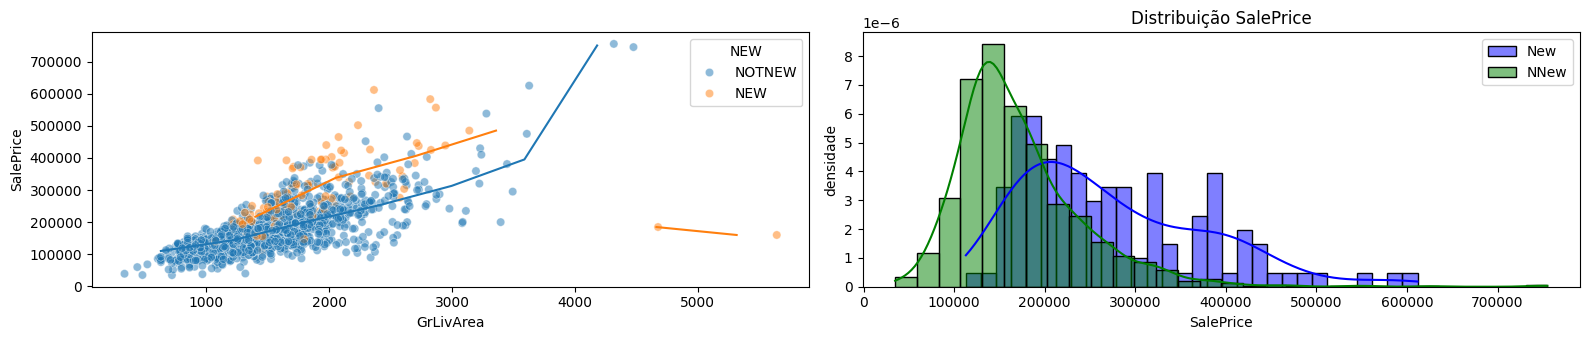

In [ ]:
plt.figure(figsize=(16, 3.5))

plt.subplot(1,2,1)
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'],hue=df['NEW'], alpha = 0.5)
mediaNew = media_bins(7,df[df['SaleType'].isin(["New"])],'GrLivArea','SalePrice')
media = media_bins(7,df[~df['SaleType'].isin(["New"])],'GrLivArea','SalePrice')
plt.plot(media[0],media[1])

plt.plot(mediaNew[0],mediaNew[1])


plt.subplot(1,2,2)
sns.histplot(df[df['SaleType'].isin(["New"])]["SalePrice"], kde=True,bins=30, stat='density', color='blue', label = "New")
sns.histplot(df[~df['SaleType'].isin(["New"])]["SalePrice"], kde=True,bins=30, stat='density', color='green', label = "NNew")
plt.xlabel('SalePrice')
plt.ylabel('densidade')
plt.title('Distribuição SalePrice')
plt.legend()

plt.tight_layout()
plt.show()
